In [5]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
def normal(X):    
    return (X-X.mean(axis=0))/X.std(axis=0)    

In [236]:
df = pd.read_csv("C:/Users/PAPAM/Desktop/FODS/3D_spatial_network.txt",sep=",",header=None)
t=df.iloc[:,3]
X=df.iloc[:,1:3]
t=np.c_[t]
X=normal(X)
t=normal(t)
X= np.c_[np.ones((len(X), 1)), X]
t_test=t[300000:]
X_test=X[300000:]
t_train=t[0:300000]
X_train=X[0:300000]

In [237]:
t_test

array([[-1.01340665],
       [-1.01683936],
       [-1.0724894 ],
       ...,
       [-0.13171492],
       [ 0.09891575],
       [ 0.13158686]])

In [289]:
class regularize:
    def __init__(self,st,regf,eta=0.01, n=700,sr=1e-10):
        self.eta = eta
        self.n= n
        self.sr= sr
        self.st=st
        self.regf=regf
    def predict(self, x):   
        return np.dot(x, self.w_)
    def fit(self, x, y):
        self.cost_ = []
        self.rmse_ = []
        self.r2_ = []
        self.w_ = np.random.randn(x.shape[1], 1)
        m = x.shape[0]
        c1=c2=0
        for i in range(self.n):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            k=0
            if(self.st=="l2"):
                k=(self.eta / m) * gradient_vector+(self.regf*self.w_*(self.eta))
            else:
                k=(self.eta / m) * gradient_vector+(self.regf*np.sign(self.w_)*(self.eta))
            self.w_ -= k
            cost=0
            if(self.st=="l2"):
                cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf/2)*np.sum(np.dot(self.w_,self.w_.T))     
            else:
                cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf)*np.sum(abs(self.w_))
            print(i, ' ',cost)
            c1=c2
            c2=cost
            self.rmse_.append((cost*2)**(0.5))
            ssr = np.sum((residuals)**2)
            sst = np.sum((y - np.mean(y))**2)
            self.r2_.append(1 - (ssr/sst))
            if abs(c2-c1)<self.sr:
                self.cost_.append(cost)
                break
            elif (c2-c1>=0)&(i>0):
                print('broken',c2)
                break
            self.cost_.append(cost)
    def testcost(self,t_test,y_pred):
        residuals=y_pred-t_test
        m=t_test.size
        if(self.st=="l2"):
            cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf/2)*np.sum(np.dot(self.w_,self.w_.T))     
        else:
            cost = np.sum((residuals ** 2)) / (2 * m) + (self.regf)*np.sum(abs(self.w_))
        return cost

In [263]:
A=regularize("l2",0.01,0.01) 

In [264]:
A.fit(X_train,t_train)

0   1.2398446252566224
1   1.2253447454658846
2   1.2112171764312085
3   1.197451157256591
4   1.1840362511493412
5   1.1709623355220815
6   1.1582195923985716
7   1.1457984991140158
8   1.1336898193007958
9   1.1218845941508484
10   1.1103741339461761
11   1.0991500098492437
12   1.0882040459452709
13   1.0775283115286667
14   1.067115113626106
15   1.0569569897489604
16   1.0470467008680384
17   1.0373772246037936
18   1.0279417486253772
19   1.0187336642521132
20   1.0097465602511675
21   1.0009742168253883
22   0.9924105997854596
23   0.9840498549007096
24   0.9758863024230774
25   0.9679144317789184
26   0.9601288964234822
27   0.9525245088530696
28   0.9450962357700211
29   0.9378391933958363
30   0.9307486429278711
31   0.9238199861352062
32   0.9170487610894028
33   0.9104306380260047
34   0.9039614153327676
35   0.8976370156607236
36   0.8914534821543002
37   0.8854069747968497
38   0.8794937668680243
39   0.8737102415095794
40   0.8680528883962637
41   0.8625183005085683
42  

In [265]:
A.w_

array([[ 0.01079638],
       [ 0.14389767],
       [-0.16714194]])

In [266]:
A.cost_[-1]

0.5007515565813082

In [267]:
A.rmse_[-1]

1.0007512743747151

In [268]:
A.r2_[-1]

0.024415512546244744

In [269]:
final=A.predict(X_test)

array([[ 0.39541225],
       [ 0.39543948],
       [ 0.39564135],
       ...,
       [-0.08564474],
       [-0.08197226],
       [-0.08216333]])

In [234]:
t_test

array([[-1.01340665],
       [-1.01683936],
       [-1.0724894 ],
       ...,
       [-0.13171492],
       [ 0.09891575],
       [ 0.13158686]])

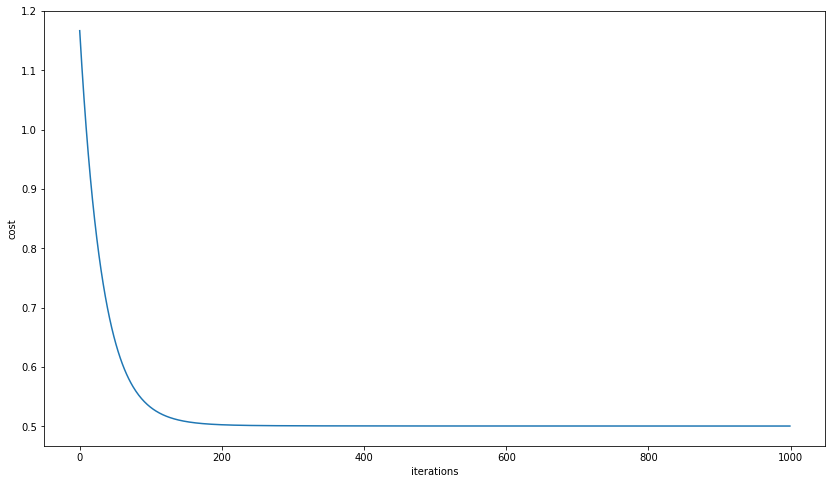

In [259]:
plt.figure(figsize=(14,8))
plt.plot(range(len(A.cost_)),A.cost_)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [260]:
B=regularize("l2",0.02,0.01) 

In [261]:
B.fit(X_train,t_train)

0   1.958471782057265
1   1.9350842738241025
2   1.912228058279126
3   1.8898884314575373
4   1.8680511283577466
5   1.8467023095069046
6   1.8258285479409464
7   1.8054168165863298
8   1.785454476031034
9   1.7659292626727812
10   1.746829277232796
11   1.728142973623808
12   1.7098591481613301
13   1.6919669291075863
14   1.6744557665378121
15   1.6573154225189461
16   1.640535961591045
17   1.6241077415420755
18   1.608021404466982
19   1.5922678681022686
20   1.5768383174275484
21   1.561724196525819
22   1.5469172006944525
23   1.5324092687991655
24   1.5181925758634245
25   1.5042595258860478
26   1.4906027448799049
27   1.4772150741249155
28   1.4640895636286992
29   1.4512194657884654
30   1.4385982292479231
31   1.4262194929431797
32   1.414077080331792
33   1.4021649937992986
34   1.3904774092377685
35   1.379008670791024
36   1.3677532857614105
37   1.3567059196731086
38   1.3458613914871564
39   1.3352146689634978
40   1.3247608641655013
41   1.314495229102571
42   1.304413

In [298]:
coste=[]
c=[0.5e-10,1e-10,2e-10,4e-10,6e-10]
for i in c:
    A=regularize("l1",i,0.01) 
    A.fit(X_train,t_train)
    t_pred=A.predict(X_test)
    e=A.testcost(t_test,t_pred)
    coste.append(e)

0   1.3971388601559682
1   1.3842044229111483
2   1.3715116315190954
3   1.359055032981615
4   1.3468293119963561
5   1.3348292872432765
6   1.3230499077755045
7   1.3114862495115789
8   1.300133511826135
9   1.2889870142361917
10   1.2780421931802937
11   1.267294598887815
12   1.256739892335835
13   1.246373842291068
14   1.2361923224343794
15   1.2261913085655363
16   1.2163668758858743
17   1.2067151963566345
18   1.1972325361308107
19   1.187915253056394
20   1.1787597942489583
21   1.169762693731613
22   1.160920570140382
23   1.1522301244931428
24   1.1436881380203026
25   1.1352914700554573
26   1.1270370559842982
27   1.1189219052501345
28   1.1109430994143854
29   1.1030977902704955
30   1.0953831980097428
31   1.0877966094374654
32   1.0803353762382697
33   1.072996913288828
34   1.0657786970169179
35   1.058678263805384
36   1.051693208439752
37   1.0448211825982576
38   1.0380598933830876
39   1.0314071018916655
40   1.0248606218268501
41   1.0184183181449535
42   1.012078

In [300]:
coste

[0.45789626708769904,
 0.4564857889108718,
 0.4564810966532685,
 0.45676453402853445,
 0.45713996213373903,
 0.4565492894528746,
 0.4566500122148096,
 0.45665865833408603]

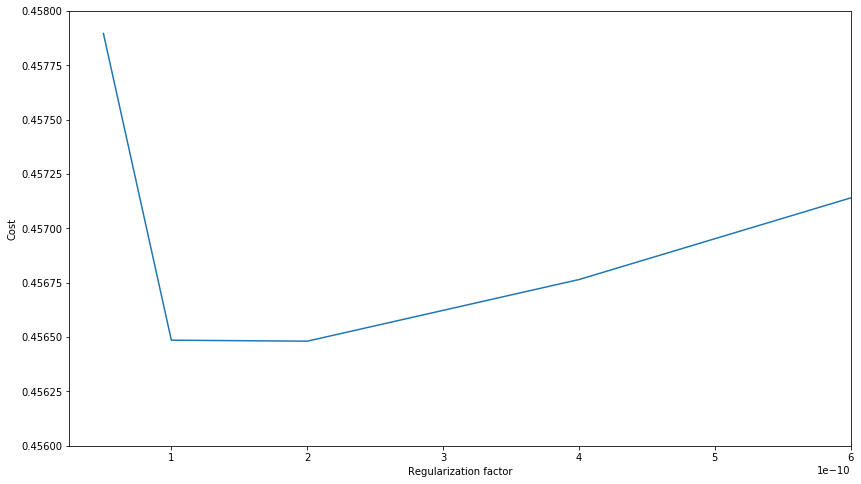

In [305]:
plt.figure(figsize=(14,8))
plt.xlim(0.25e-10,6e-10)
plt.ylim(4.56e-1,4.58e-1)
plt.plot(c,coste)
plt.xlabel('Regularization factor')
plt.ylabel('Cost')
plt.show()

In [306]:
coste=[]
c=[0.5e-10,1e-10,2e-10,4e-10,6e-10]
for i in c:
    A=regularize("l2",i,0.01) 
    A.fit(X_train,t_train)
    t_pred=A.predict(X_test)
    e=A.testcost(t_test,t_pred)
    coste.append(e)

0   1.9610113495272734
1   1.9197465564091207
2   1.8796857235163673
3   1.8407930869038889
4   1.8030339567401878
5   1.7663746848205262
6   1.7307826330671352
7   1.696226142986428
8   1.6626745060540475
9   1.6300979349994804
10   1.5984675359628215
11   1.5677552814971332
12   1.5379339843906157
13   1.508977272283627
14   1.480859563056346
15   1.4535560409635868
16   1.4270426334940236
17   1.401295988931758
18   1.3762934545988463
19   1.3520130557580343
20   1.328433475155618
21   1.3055340331849254
22   1.2832946686515336
23   1.2616959201218918
24   1.240718907837609
25   1.220345316178167
26   1.2005573766553854
27   1.181337851423444
28   1.1626700172887856
29   1.1445376502046665
30   1.1269250102356363
31   1.1098168269776283
32   1.093198285419812
33   1.0770550122347617
34   1.0613730624839224
35   1.0461389067257345
36   1.0313394185141709
37   1.0169618622758236
38   1.0029938815540203
39   0.9894234876088145
40   0.9762390483620343
41   0.9634292776768915
42   0.9509

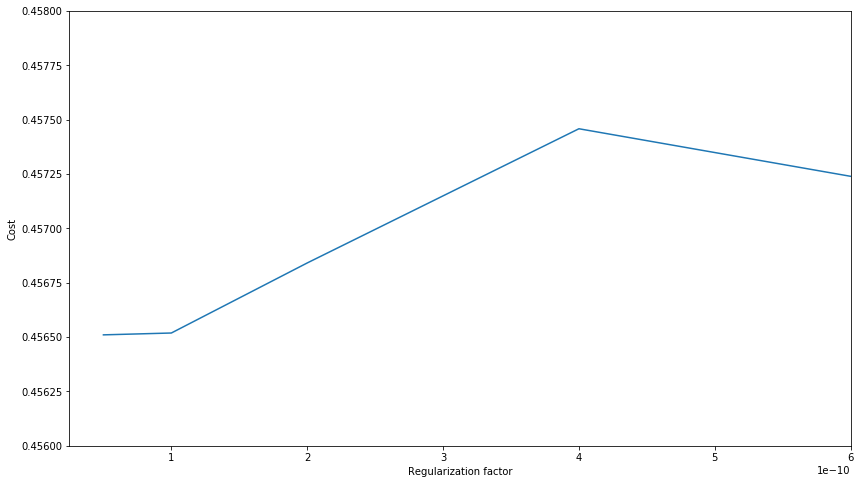

In [307]:
plt.figure(figsize=(14,8))
plt.xlim(0.25e-10,6e-10)
plt.ylim(4.56e-1,4.58e-1)
plt.plot(c,coste)
plt.xlabel('Regularization factor')
plt.ylabel('Cost')
plt.show()